In [2]:
import random
def merge(arr,start,mid,end):
    n1=mid-start+1
    n2=end-mid
    l=[0]*n1
    r=[0]*n2
    for i in range(n1):
        l[i]=arr[start+i]
    for j in range(n2):
        r[j]=arr[mid+1+j]
        i,j=0,0
        k=start
    while i<n1 and j<n2:
        if l[i][2]<r[j][2]:
            arr[k]=l[i]
            k+=1
            i+=1
        else:
            arr[k]=r[j]
            j+=1
            k+=1
    while i<n1:
        arr[k]=l[i]
        i+=1
        k+=1
    while j<n2:
        arr[k]=r[j]
        j+=1
        k+=1
def mergesort(arr,start,end):
    if start<end:
        mid=(start+end)//2
        mergesort(arr,start,mid)
        mergesort(arr,mid+1,end)
        merge(arr,start,mid,end)
def merge2(arr,start,mid,end):
    n1=mid-start+1
    n2=end-mid
    l=[0]*n1
    r=[0]*n2
    for i in range(n1):
        l[i]=arr[start+i]
    for j in range(n2):
        r[j]=arr[mid+1+j]
        i,j=0,0
        k=start
    while i<n1 and j<n2:
        if l[i]<r[j]:
            arr[k]=l[i]
            k+=1
            i+=1
        else:
            arr[k]=r[j]
            j+=1
            k+=1
    while i<n1:
        arr[k]=l[i]
        i+=1
        k+=1
    while j<n2:
        arr[k]=r[j]
        j+=1
        k+=1
def mergesort2(arr,start,end):
    if start<end:
        mid=(start+end)//2
        mergesort2(arr,start,mid)
        mergesort2(arr,mid+1,end)
        merge2(arr,start,mid,end)        
        


In [3]:
def update_graph(graph, mst):
    graph_set = set(tuple(edge) for edge in graph)
    mst_set = set(tuple(edge) for edge in mst)
    result_set = graph_set - mst_set
    return [list(edge) for edge in result_set]


In [4]:
def odd_matching(odd_nodes, edge_list):
    used = set()
    matches = []

    def get_weight(u, v):
        for edge in edge_list:
            if (edge[0] == u and edge[1] == v) or (edge[0] == v and edge[1] == u):
                return edge[2]
        return float('inf')  

    for i in range(len(odd_nodes)):
        if odd_nodes[i] in used:
            continue
        min_dist = float('inf')
        best_match = -1
        for j in range(i + 1, len(odd_nodes)):
            if odd_nodes[j] in used:
                continue
            u, v = odd_nodes[i], odd_nodes[j]
            w = get_weight(u, v)
            if w < min_dist:
                min_dist = w
                best_match = j
        if best_match != -1:
            u = odd_nodes[i]
            v = odd_nodes[best_match]
            matches.append([u, v, get_weight(u, v)])
            used.add(u)
            used.add(v)
    return matches


In [5]:
def build_multigraph(mst,oddmatches):
    multigraph = mst.copy()
    mst_edges = set((min(u, v), max(u, v)) for u, v, _ in mst)

    for u, v, w in oddmatches:
        if (min(u, v), max(u, v)) not in mst_edges:
            multigraph.append([u, v, w])
    return multigraph

In [6]:
from collections import defaultdict

def build_adj_list(multigraph):
    adj = defaultdict(list)
    for u, v, _ in multigraph:
        adj[u].append(v)
        adj[v].append(u)
    return adj

In [7]:
def find_eulerian_tour(adj):
    tour = []
    stack = [0]  # start from node 0
    current_path = []

    while stack:
        u = stack[-1]
        if adj[u]:
            v = adj[u].pop()
            adj[v].remove(u)
            stack.append(v)
        else:
            tour.append(stack.pop())

    return tour[::-1] 

In [8]:
def convert_to_edge_path(nodes, distance_matrix):
    edge_path = []
    for i in range(len(nodes) - 1):
        u = nodes[i]
        v = nodes[i + 1]
        weight = distance_matrix[u][v]
        edge_path.append([u, v, weight])
    return edge_path


In [9]:

def find(parent, i):
    if parent[i] != i:
        parent[i] = find(parent, parent[i])
    return parent[i]

def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)
    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1

def mst(graph, n_nodes):
    parent = list(range(n_nodes))
    rank = [0] * n_nodes
    mst_ans = []

    for u, v, w in sorted(graph, key=lambda x: x[2]):
        if find(parent, u) != find(parent, v):
            mst_ans.append([u, v, w])
            union(parent, rank, u, v)
    return mst_ans


In [10]:
def tsp(eulerian_path):
    visited = set()
    tsp_path = []
    total_cost = 0

    for u, v, w in eulerian_path:
        if u not in visited:
            tsp_path.append(u)
            visited.add(u)
        if v not in visited:
            tsp_path.append(v)
            visited.add(v)

    # To form a cycle, connect last to first
    tsp_edges = []
    for i in range(len(tsp_path)):
        u = tsp_path[i]
        v = tsp_path[(i + 1) % len(tsp_path)]
        cost = distance_matrix[u][v]
        tsp_edges.append([u, v, cost])
        total_cost += cost

    return tsp_edges, total_cost


In [11]:
def get_distance(u, v, dist_matrix):
    return dist_matrix[u][v]

def calculate_path_cost(path, dist_matrix):
    return sum(get_distance(a, b, dist_matrix) for a, b, _ in path)

def _2opt(tsp_path, dist_matrix):
    n = len(tsp_path)
    path_nodes = [tsp_path[0][0]] + [edge[1] for edge in tsp_path]
    best = path_nodes
    best_distance = calculate_path_cost(
        [[best[i], best[i+1], get_distance(best[i], best[i+1], dist_matrix)] for i in range(len(best)-1)],
        dist_matrix
    )

    improved = True
    while improved:
        improved = False
        for i in range(1, n - 1):
            for j in range(i + 1, n):
                if j - i == 1: continue  
                new_path = best[:i] + best[i:j][::-1] + best[j:]
                new_cost = calculate_path_cost(
                    [[new_path[k], new_path[k+1], get_distance(new_path[k], new_path[k+1], dist_matrix)] for k in range(n)],
                    dist_matrix
                )
                if new_cost < best_distance:
                    best = new_path
                    best_distance = new_cost
                    improved = True
                    break
            if improved:
                break

    optimized_edges = [[best[i], best[i+1], get_distance(best[i], best[i+1], dist_matrix)] for i in range(n)]
    return optimized_edges, best_distance


In [17]:
data={}
data["distance_matrix"] = [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ]
distance_matrix=data["distance_matrix"]
graph = []
for i in range(len(distance_matrix)):
    for j in range(i+1,len(distance_matrix)):
        graph.append([i, j, distance_matrix[i][j]])

mergesort(graph,0,len(graph)-1)
t=[]
t.append(graph[0])
node=[]
node.append(t[0][0])
node.append(t[0][1])
edge=[[t[0][0],t[0][1]]]
weight=0
for i in range(1,len(graph)):
        if (graph[i][0] in node and graph[i][1] in node) or [graph[i][0],graph[i][1]] in edge  :
            continue
        if graph[i] not in t :
            t.append(graph[i])
            if graph[i][0] not in node:
                node.append(graph[i][0])
            if graph[i][1] not in node:
                node.append(graph[i][1])
            edge.append([graph[i][0],graph[i][1]])

for i in range(len(t),len(graph)):
    if len(t)==len(node)-1:
        break
    else:
        if [graph[i][0],graph[i][1]] in edge  :
            continue
        else:
            t.append(graph[i])
            edge.append([graph[i][0],graph[i][1]])
mst_ans=mst(graph,len(node))
    
for i in mst_ans:
    weight+=i[2]
print("node = ",node)
print("edge = ",edge)
print("mst1 = ",t,"\n")
print("mst2 = ",mst_ans,"\n")

print("weight = ",weight)

n=[]
oddnode=[]
for i in edge:
    n.append(i[0])
    n.append(i[1])
mergesort2(n,0,len(n)-1)
mergesort2(node,0,len(node)-1)
print(n)
q=0
for i in node:
    count=0
    for j in range(q,len(n)):
        q=j
        if i==n[j]:
            count+=1
        else:
            break
    if count%2!=0:
        oddnode.append(i)
print("oddnode = ",oddnode)
oddmatches=odd_matching(oddnode,graph)
print("oddmatches = ",oddmatches,"\n")

multigraph=build_multigraph(mst_ans,oddmatches)
print("multigraph = ",multigraph)

adj=build_adj_list(multigraph)
print("\n adj = ",adj,"\n")
eulerian=find_eulerian_tour(adj)
print("eulerian = ",eulerian,"\n")

eulerian_path=convert_to_edge_path(eulerian,distance_matrix)
print("eulerian_path = ",eulerian_path,"\n")

tsp_ans,final_weight=tsp(eulerian_path)
print("tsp = ",tsp_ans,"\n")
print(" weight = ",final_weight,"\n")

updated_tsp,best_dist=_2opt(tsp_ans,distance_matrix)
print("final tsp = ",updated_tsp,"\n")
print("final weight = ",best_dist,"\n")

node =  [0, 7, 5, 10, 2, 9, 3, 1, 11, 4, 12, 8, 6]
edge =  [[0, 7], [5, 10], [2, 9], [2, 3], [1, 11], [4, 12], [1, 8], [6, 8], [11, 12], [5, 9], [1, 12], [4, 11]]
mst1 =  [[0, 7, 213], [5, 10, 225], [2, 9, 262], [2, 3, 355], [1, 11, 357], [4, 12, 371], [1, 8, 403], [6, 8, 678], [11, 12, 504], [5, 9, 547], [1, 12, 579], [4, 11, 586]] 

mst2 =  [[0, 7, 213], [5, 10, 225], [2, 9, 262], [2, 3, 355], [1, 11, 357], [4, 12, 371], [1, 8, 403], [11, 12, 504], [5, 9, 547], [4, 5, 663], [6, 8, 678], [0, 2, 713]] 

weight =  5291
[0, 1, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 11, 11, 12, 12, 12]
oddnode =  [0, 1, 3, 6, 7, 10, 11, 12]
oddmatches =  [[0, 7, 213], [1, 11, 357], [3, 12, 987], [6, 10, 1891]] 

multigraph =  [[0, 7, 213], [5, 10, 225], [2, 9, 262], [2, 3, 355], [1, 11, 357], [4, 12, 371], [1, 8, 403], [11, 12, 504], [5, 9, 547], [4, 5, 663], [6, 8, 678], [0, 2, 713], [3, 12, 987], [6, 10, 1891]]

 adj =  defaultdict(<class 'list'>, {0: [7, 2], 7: [0], 5: [10, 9, 4], 10: [5,

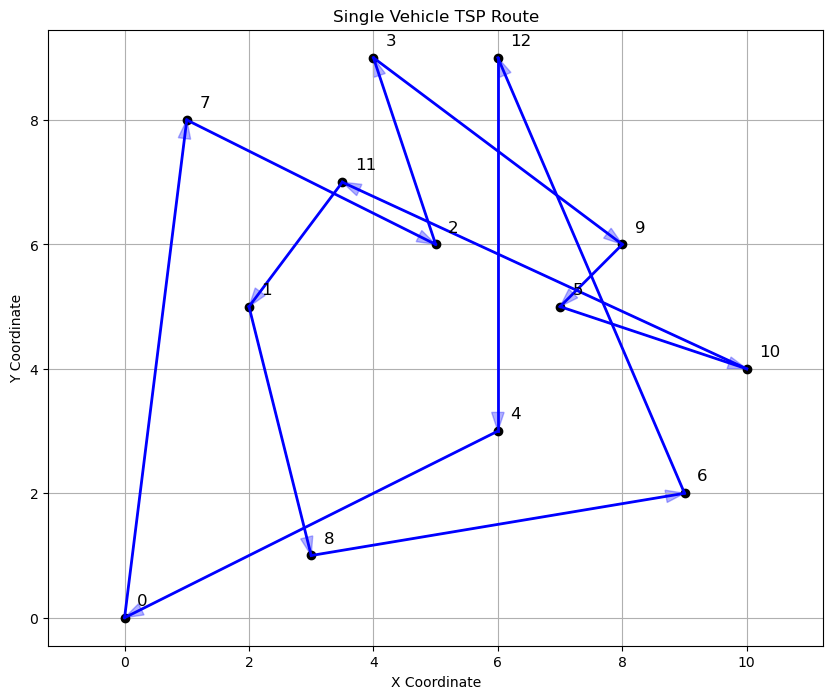

In [13]:
import matplotlib.pyplot as plt

# Coordinates for each city (you can update them as per your setup)
city_coordinates = {
    0: (0, 0),       # Depot
    1: (2, 5),
    2: (5, 6),
    3: (4, 9),
    4: (6, 3),
    5: (7, 5),
    6: (9, 2),
    7: (1, 8),
    8: (3, 1),
    9: (8, 6),
    10: (10, 4),
    11: (3.5, 7),
    12: (6, 9),
}

def plot_single_vehicle_tsp(tsp_path):
    plt.figure(figsize=(10, 8))

    # Plot city points
    for node, (x, y) in city_coordinates.items():
        plt.plot(x, y, 'ko')
        plt.text(x + 0.2, y + 0.2, str(node), fontsize=12)

    # Draw the path
    for i, (u, v, _) in enumerate(tsp_path):
        x1, y1 = city_coordinates[u]
        x2, y2 = city_coordinates[v]
        plt.plot([x1, x2], [y1, y2], color='blue', linewidth=2)
        plt.arrow(x1, y1, x2 - x1, y2 - y1,
                  head_width=0.2, length_includes_head=True, color='blue', alpha=0.3)

    plt.title("Single Vehicle TSP Route")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.axis("equal")
    plt.show()

# Example usage:
# tsp = [[0, 7, 213], [7, 2, 851], [2, 3, 355], ..., [4, 0, 1631]]
plot_single_vehicle_tsp(updated_tsp)


In [14]:
def multi_vehicle_tsp(distance_matrix, k_vehicles):
    import heapq
    import random

    n = len(distance_matrix)
    depot = 0
    all_nodes = list(range(1, n))  # Exclude depot

    # Step 1: Assign nodes to vehicles based on distance to depot
    node_distances = [(distance_matrix[depot][i], i) for i in all_nodes]
    node_distances.sort()  # Sort by proximity to depot

    # Distribute nodes to k vehicles in round robin to balance loads
    chunks = [[] for _ in range(k_vehicles)]
    for i, (_, node) in enumerate(node_distances):
        chunks[i % k_vehicles].append(node)

    vehicle_routes = []
    total_weight = 0

    for v in range(k_vehicles):
        nodes = [depot] + chunks[v]  # Each vehicle starts at depot
        sub_matrix = [[distance_matrix[u][v] for v in nodes] for u in nodes]

        # Map local to global node indices
        global_idx = {i: nodes[i] for i in range(len(nodes))}

        # Build graph for local TSP
        sub_graph = []
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                sub_graph.append([i, j, sub_matrix[i][j]])

        # Step-by-step TSP logic (MST -> Matching -> Multigraph -> Eulerian -> Path -> 2-opt)
        sub_mst = mst(sub_graph, len(nodes))
        degrees = [0] * len(nodes)
        for u, v, _ in sub_mst:
            degrees[u] += 1
            degrees[v] += 1
        odd = [i for i in range(len(nodes)) if degrees[i] % 2 != 0]
        oddmatches = odd_matching(odd, sub_graph)
        multi = build_multigraph(sub_mst, oddmatches)
        adj = build_adj_list(multi)
        euler = find_eulerian_tour(adj)
        euler_path = convert_to_edge_path(euler, sub_matrix)
        tsp_path, _ = tsp(euler_path)
        optimized_path, path_cost = _2opt(tsp_path, sub_matrix)

        # Convert local to global indices
        global_path = [[global_idx[u], global_idx[v], distance_matrix[global_idx[u]][global_idx[v]]] for u, v, _ in optimized_path]

        vehicle_routes.append(global_path)
        total_weight += path_cost

    return vehicle_routes, total_weight


In [31]:
data={}
data["distance_matrix"] = [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ]
distance_matrix=data["distance_matrix"]
routes, weight = multi_vehicle_tsp(distance_matrix, 1)

for i, route in enumerate(routes):
    print(f"Vehicle {i+1} route:",end="  ")
    for edge in route:
        print(edge,end="  ")
    print()

print("Total cost across all 4 vehicles:", weight)


Vehicle 1 route:  [0, 9, 875]  [9, 5, 547]  [5, 10, 225]  [10, 11, 1017]  [11, 1, 357]  [1, 8, 403]  [8, 6, 678]  [6, 12, 701]  [12, 4, 371]  [4, 3, 700]  [3, 2, 355]  [2, 7, 851]  [7, 0, 213]  
Total cost across all 4 vehicles: 7293


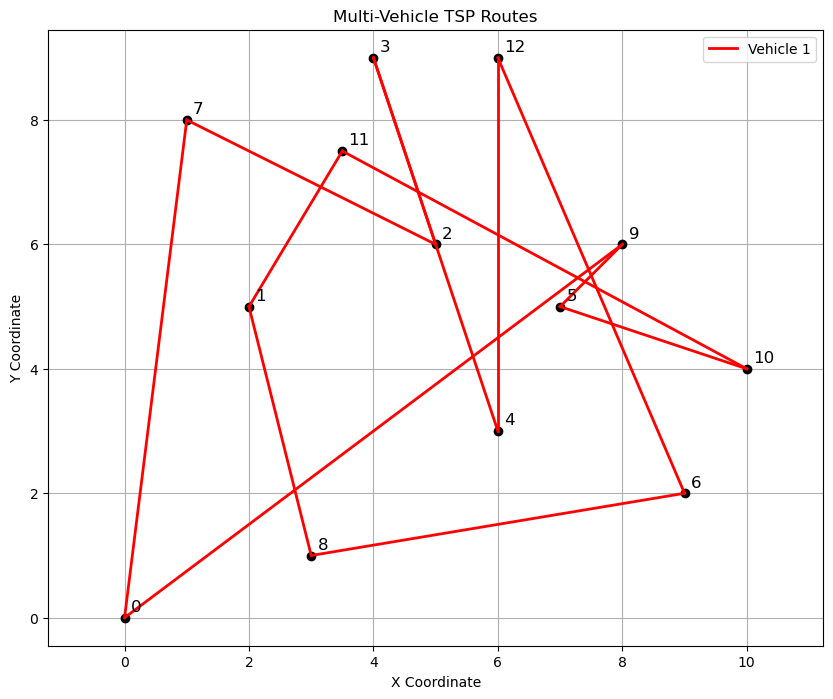

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Coordinates for each city (fake 2D positions for 13 cities)
city_coordinates = {
    0: (0, 0),       # Depot
    1: (2, 5),
    2: (5, 6),
    3: (4, 9),
    4: (6, 3),
    5: (7, 5),
    6: (9, 2),
    7: (1, 8),
    8: (3, 1),
    9: (8, 6),
    10: (10, 4),
    11: (3.5, 7.5),
    12: (6, 9),
}

def plot_routes(vehicle_routes):
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
    plt.figure(figsize=(10, 8))

    # Plot all cities
    for node, (x, y) in city_coordinates.items():
        plt.plot(x, y, 'ko')
        plt.text(x + 0.1, y + 0.1, str(node), fontsize=12)

    # Plot each vehicle's path
    for v_idx, route in enumerate(vehicle_routes):
        for u, v, _ in route:
            x1, y1 = city_coordinates[u]
            x2, y2 = city_coordinates[v]
            plt.plot([x1, x2], [y1, y2], color=colors[v_idx % len(colors)], linewidth=2, label=f"Vehicle {v_idx+1}" if route.index([u, v, _]) == 0 else "")

    plt.title("Multi-Vehicle TSP Routes")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

# Usage:
# Assuming `routes` is the output from multi_vehicle_tsp()
# routes, total_cost = multi_vehicle_tsp(distance_matrix, 4)
# Then call:
plot_routes(routes)


╒════════════════════════╤════════════╤═════════════════════════╕
│ Method                 │ Vehicles   │   Total Distance (Cost) │
╞════════════════════════╪════════════╪═════════════════════════╡
│ Your Code              │ 1 Vehicle  │                    7815 │
├────────────────────────┼────────────┼─────────────────────────┤
│ Your Code multivehicle │ 1 Vehicles │                    7293 │
├────────────────────────┼────────────┼─────────────────────────┤
│ Your Code multivehicle │ 4 Vehicles │                   20635 │
├────────────────────────┼────────────┼─────────────────────────┤
│ OR-Tools               │ 1 Vehicle  │                    7293 │
├────────────────────────┼────────────┼─────────────────────────┤
│ OR-Tools               │ 4 Vehicles │                    7569 │
╘════════════════════════╧════════════╧═════════════════════════╛


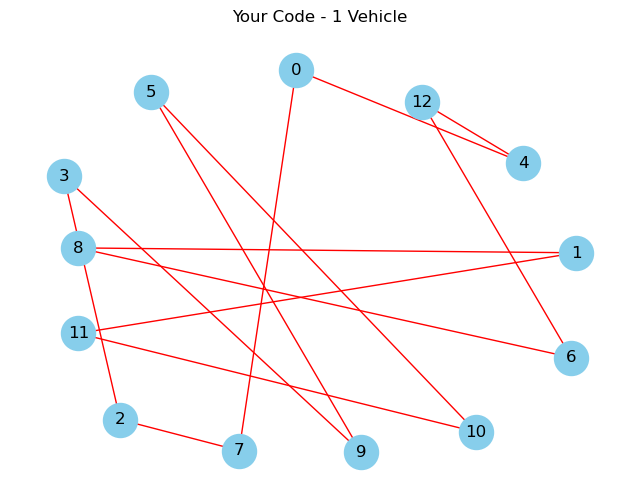

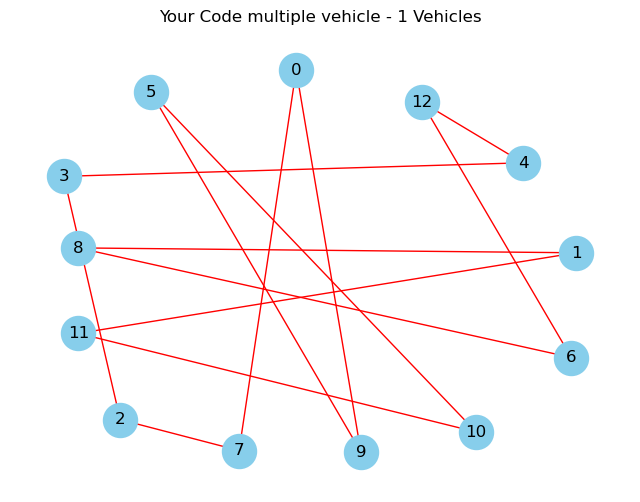

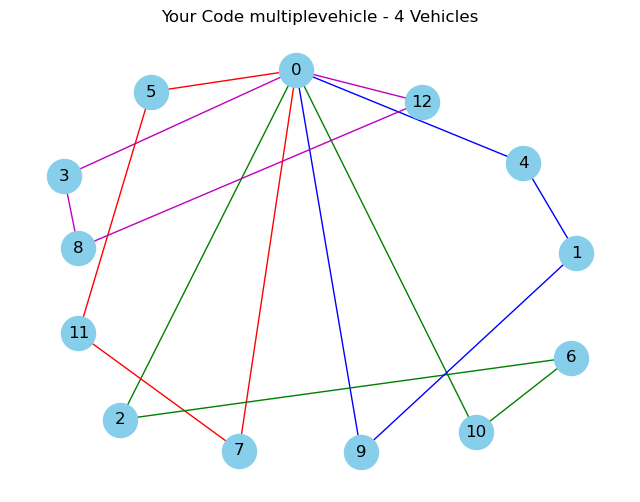

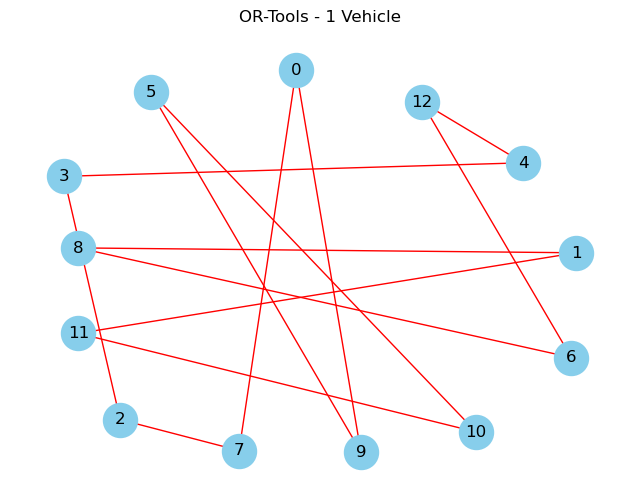

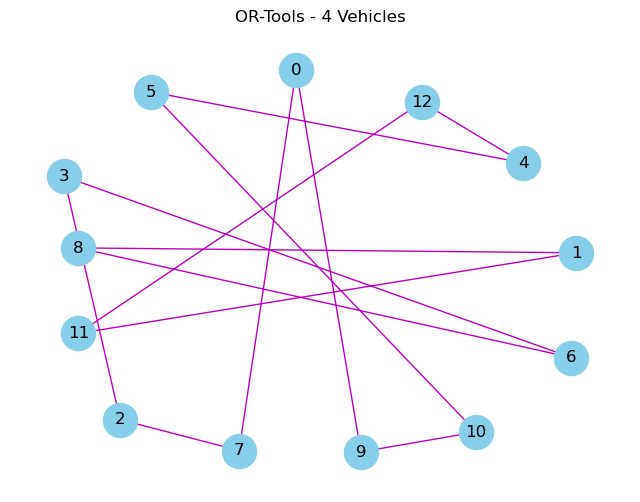

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

# ========= 🎯 Replace These With Your Actual Results ==========

# 🔵 Your custom single vehicle route (example)
custom_1_vehicle_routes = [
    [[0, 7, 213], [7, 2, 851], [2, 3, 355], [3, 9, 466], [9, 5, 547],
     [5, 10, 225], [10, 11, 1017], [11, 1, 357], [1, 8, 403],
     [8, 6, 678], [6, 12, 701], [12, 4, 371], [4, 0, 1631]]
]
custom_1_vehicle_cost = 7815

# 🔵 Your custom 4 vehicle route (example)
custom_4_vehicle_routes1 = [
    [[0, 9, 875], [9, 5, 547], [5, 10, 225], [10, 11, 1017],
    [11, 1, 357], [1, 8, 403], [8, 6, 678],
    [6, 12, 701], [12, 4, 371], [4, 3, 700],
    [3, 2, 355], [2, 7, 851], [7, 0, 213]]
]
custom_4_vehicle_cost1 = 7293

custom_4_vehicle_routes2=[
    [[0, 5, 1374], [5, 11, 887], [11, 7, 2300], [7, 0, 213]],
    [[0, 2, 713], [2, 6, 1737], [6, 10, 1891] ,[10, 0, 1420]],
    [[0, 4, 1631], [4, 1, 831], [1, 9, 1589], [9, 0, 875]],
    [[0, 12, 1972] ,[12, 8, 600], [8, 3, 1584], [3, 0, 1018]]
    
]
custom_4_vehicle_cost2 = 20635

# 🔵 OR-Tools single vehicle route (example)
ortools_1_vehicle_routes = [
    [[0, 7, 213], [7, 2, 851], [2, 3, 355], [3, 4, 700],
     [4, 12, 371], [12, 6, 701], [6, 8, 678], [8, 1, 403],
     [1, 11, 357], [11, 10, 1017], [10, 5, 225], [5, 9, 547], [9, 0, 875]]
    
]
ortools_1_vehicle_cost = 7293

# 🔵 OR-Tools 4 vehicle route (example)
ortools_4_vehicle_routes = [
    [],  # Vehicle 0 - unused
    [],  # Vehicle 1 - unused
    [],  # Vehicle 2 - unused
    [[0, 7, 213], [7, 2, 851], [2, 3, 355], [3, 6, 1395], [6, 8, 678], 
     [8, 1, 403], [1, 11, 357], [11, 12, 504], [12, 4, 371], [4, 5, 663], 
     [5, 10, 225], [10, 9, 679], [9, 0, 1744]]
]
ortools_4_vehicle_cost = 7569


# ========= 🧱 Visualization Function ==========
def visualize_routes(routes, title="TSP Solution"):
    import matplotlib.pyplot as plt
    import networkx as nx

    plt.figure(figsize=(8, 6))
    G = nx.Graph()
    pos = nx.spring_layout(range(13), seed=42)  # fixed layout
    colors = ['r', 'g', 'b', 'm', 'c', 'orange', 'yellow', 'purple']

    for i, route in enumerate(routes):
        for u, v, _ in route:
            G.add_edge(u, v, color=colors[i % len(colors)])

    edge_colors = [G[u][v]['color'] for u, v in G.edges()]

    ax = plt.gca()  # ✅ Fix: get current Axes properly
    nx.draw(
        G, pos,
        ax=ax,
        with_labels=True,
        edge_color=edge_colors,
        node_color='skyblue',
        node_size=600,
        font_size=12
    )
    plt.title(title)
    plt.show()


# ========= 📊 Comparison Table ==========
from tabulate import tabulate

comparison_data = [
    ["Your Code", "1 Vehicle", custom_1_vehicle_cost],
    ["Your Code multivehicle", "1 Vehicles", custom_4_vehicle_cost1],
    ["Your Code multivehicle", "4 Vehicles", custom_4_vehicle_cost2],
    ["OR-Tools", "1 Vehicle", ortools_1_vehicle_cost],
    ["OR-Tools", "4 Vehicles", ortools_4_vehicle_cost],
]

print(tabulate(comparison_data, headers=["Method", "Vehicles", "Total Distance (Cost)"], tablefmt="fancy_grid"))

# ========= 🖼️ Visualize ==========
visualize_routes(custom_1_vehicle_routes, "Your Code - 1 Vehicle")
visualize_routes(custom_4_vehicle_routes1, "Your Code multiple vehicle - 1 Vehicles")
visualize_routes(custom_4_vehicle_routes2, "Your Code multiplevehicle - 4 Vehicles")
visualize_routes(ortools_1_vehicle_routes, "OR-Tools - 1 Vehicle")
visualize_routes(ortools_4_vehicle_routes, "OR-Tools - 4 Vehicles")
